# **Project Name**    - **Credit Card Default Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

This is a Machine Learning Project which aims to identify customers who are at risk of defaulting on their credit card payments. This can be done by analyzing a variety of factors, including the customer's payment history, income, debt, and other financial information.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This project is aimed at predicting the case of customers' default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Module/Project/Classification/default of credit card clients.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows = len(dataset.axes[0])
cols = len(dataset.axes[1])

print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 30000
Number of Columns: 25


### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

**There are no duplicates in the dataset.**

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum().sort_values(ascending = False)

ID                            0
BILL_AMT2                     0
PAY_AMT6                      0
PAY_AMT5                      0
PAY_AMT4                      0
PAY_AMT3                      0
PAY_AMT2                      0
PAY_AMT1                      0
BILL_AMT6                     0
BILL_AMT5                     0
BILL_AMT4                     0
BILL_AMT3                     0
BILL_AMT1                     0
LIMIT_BAL                     0
PAY_6                         0
PAY_5                         0
PAY_4                         0
PAY_3                         0
PAY_2                         0
PAY_0                         0
AGE                           0
MARRIAGE                      0
EDUCATION                     0
SEX                           0
default payment next month    0
dtype: int64

**There are no null values.**

<Axes: >

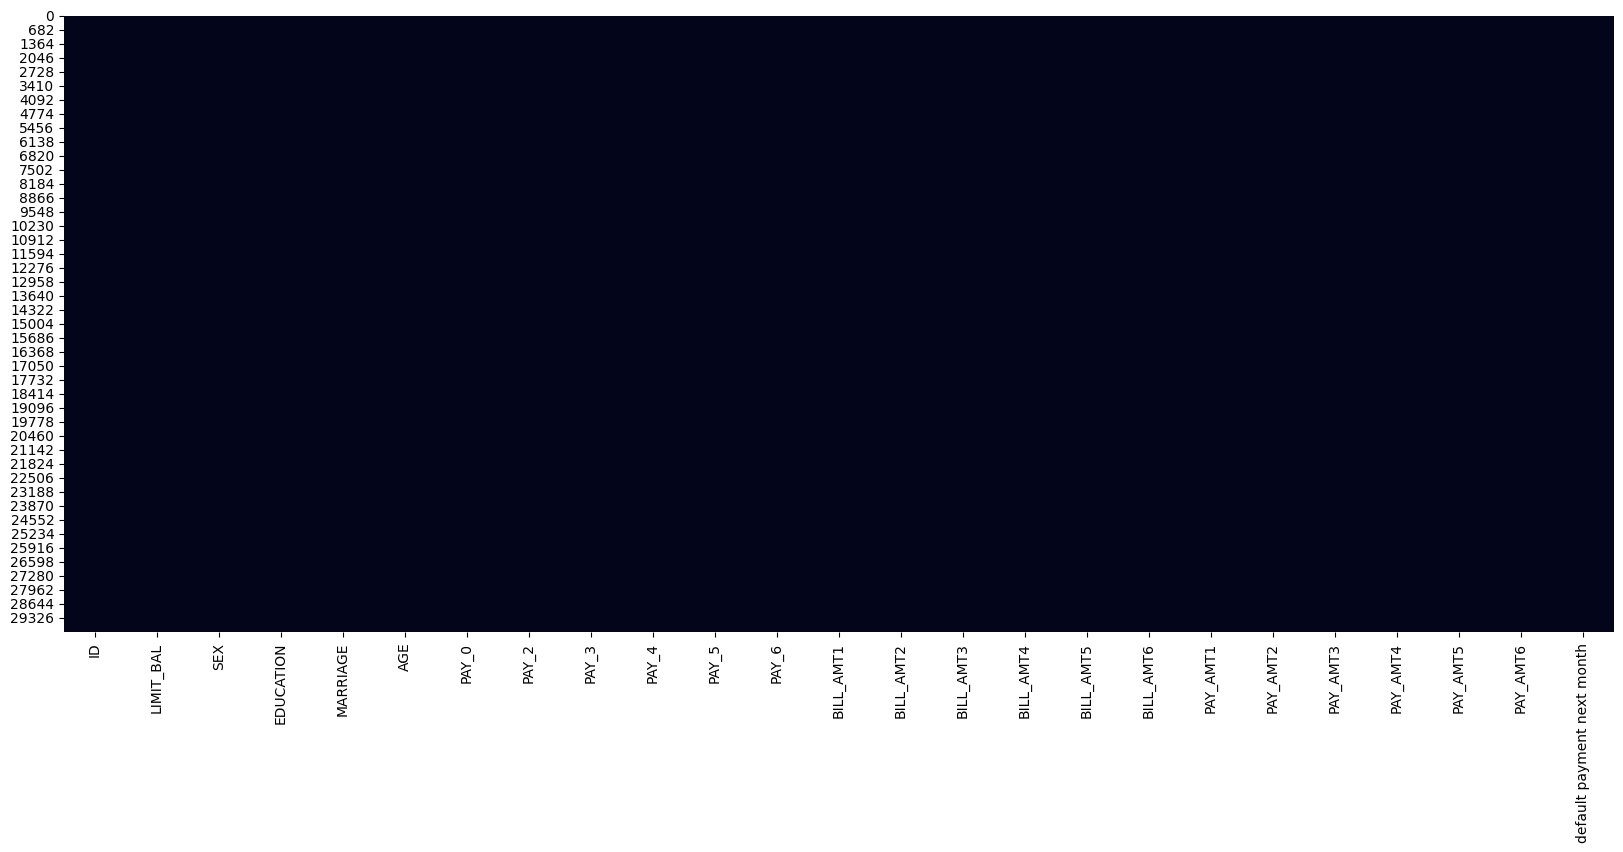

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(20,8))
sns.heatmap(dataset.isnull(), cbar=False)

**There are no null values therefore it is all black.**

### What did you know about your dataset?

The dataset contains information of default payments, their limit balance, history of payment, past credit card bills from credit card clients in Taiwan.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description 



*   **LIMIT_BAL** -  Amount of given credit  (includes both individual customer credit and his/her family supplementary credit.
*   **SEX** - Gender (1 = Male; 2 = Female)
*   **MARRIAGE** - Marital Status (1 = Married; 2 = Single; 3 = Others)
*   **EDUCATION** - Educational Qualification (1 = Graduate School; 2 = University; 3 = High School; 4 = Others)
*   **AGE** - Age in Years
*  **PAY_0 to PAY_6** - History of Past Payment. **PAY_0** is repayment status in September 2005, **PAY_2** is the repayment status in August 2005... **PAY_6** is the repayment status in April 2005.
(-1 = Paid Duly; 1 = Payment Delay of 1 month; 2 = Payment Delay of 2 months; 3 = Payment Delay of 3 months and above)
*   **BILL_AMT1 to BILL_AMT6** - Amount of Bill Statement . **BILL_AMT1** is the amount of bill statement in September 2005, **BILL_AMT2** is the amount of bill statement in August 2005..., **BILL_AMT6** is the amount of bill statement in April 2005
*   **PAY_AMT1 to PAY_AMT6** - Amount of previous payment. **PAY_AMT1** is the amount paid in September 2005, **PAY_AMT2** is the amount paid in August 2005,..., **PAY_AMT6** is the amount paid in April 2005,
*   **default payment next month** - 0 = No; 1 = Yes

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
pd.Series({col:dataset[col].unique() for col in dataset})

ID                            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
LIMIT_BAL                     [20000, 120000, 90000, 50000, 500000, 100000, ...
SEX                                                                      [2, 1]
EDUCATION                                                 [2, 1, 3, 5, 4, 6, 0]
MARRIAGE                                                           [1, 2, 3, 0]
AGE                           [24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 3...
PAY_0                                       [2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]
PAY_2                                       [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
PAY_3                                       [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
PAY_4                                       [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
PAY_5                                          [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
PAY_6                                          [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]
BILL_AMT1                     [3913, 268

In [ ]:
# Counting the number of unique values
dataset.nunique().sort_values(ascending=True)

default payment next month        2
SEX                               2
MARRIAGE                          4
EDUCATION                         7
PAY_5                            10
PAY_6                            10
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
AGE                              56
LIMIT_BAL                        81
PAY_AMT5                       6897
PAY_AMT4                       6937
PAY_AMT6                       6939
PAY_AMT3                       7518
PAY_AMT2                       7899
PAY_AMT1                       7943
BILL_AMT6                     20604
BILL_AMT5                     21010
BILL_AMT4                     21548
BILL_AMT3                     22026
BILL_AMT2                     22346
BILL_AMT1                     22723
ID                            30000
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Renaming the columns for easy understanding
dataset = dataset.rename(columns={'SEX':'GENDER', 'MARRIAGE':'MARITAL_STATUS', 'default payment next month':'DEFAULT_STATUS', 'PAY_0':'PAY_1'})

In [ ]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'AGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_STATUS'],
      dtype='object')

We can see from the variables description that we know the details of education as 1 = Graduate School and so on. But when we check our unique values, apart from 1,2,3,4 we also have 0, 5 and 6. So, let's combine them into **Others**.

In [ ]:
dataset["EDUCATION"] = dataset["EDUCATION"].apply(lambda x: "Graduate School" if x==1 else ("Univeristy" if x==2 else ("High School" if x==3 else "Others")))

Using suitable gender names instead of numbers so that we can categorise later.

In [ ]:
dataset['GENDER'] = dataset["GENDER"].apply(lambda x: "Male" if x==1 else "Female")

We can see from variables description that we know the details of Marital Status as 1 = Married and so on. But when we check our unique values, we see that apart from 1,2,3 we have 0 also. So, let's combine them into **Others**.

In [ ]:
dataset['MARITAL_STATUS'] = dataset["MARITAL_STATUS"].apply(lambda x: "Married" if x==1 else ("Single" if x==2 else "Others"))

In [ ]:
dataset.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARITAL_STATUS,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS
0,1,20000,Female,Univeristy,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,Univeristy,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,Univeristy,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,Univeristy,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,Univeristy,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              30000 non-null  int64 
 1   LIMIT_BAL       30000 non-null  int64 
 2   GENDER          30000 non-null  object
 3   EDUCATION       30000 non-null  object
 4   MARITAL_STATUS  30000 non-null  object
 5   AGE             30000 non-null  int64 
 6   PAY_1           30000 non-null  int64 
 7   PAY_2           30000 non-null  int64 
 8   PAY_3           30000 non-null  int64 
 9   PAY_4           30000 non-null  int64 
 10  PAY_5           30000 non-null  int64 
 11  PAY_6           30000 non-null  int64 
 12  BILL_AMT1       30000 non-null  int64 
 13  BILL_AMT2       30000 non-null  int64 
 14  BILL_AMT3       30000 non-null  int64 
 15  BILL_AMT4       30000 non-null  int64 
 16  BILL_AMT5       30000 non-null  int64 
 17  BILL_AMT6       30000 non-null  int64 
 18  PAY_AM

Dropping the column ID from our dataset.

In [ ]:
dataset.drop(["ID"], axis=1, inplace= True) 

### What all manipulations have you done and insights you found?



*   Renamed some of the column names so that it is easy understandable.
*   For the column **EDUCATION**, instead of numbers, replaced them with their actual values. Also, categorised unknown values into **Others**.
*   For the column **GENDER**, instead of numbers , replaced them with their actual values.
*   For the column **MARITAL_STATUS**. instead of numbers, replaced them with their actual values. Also, categorised unknown values into **Others**. 
*   Dropped the column **ID** from our dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

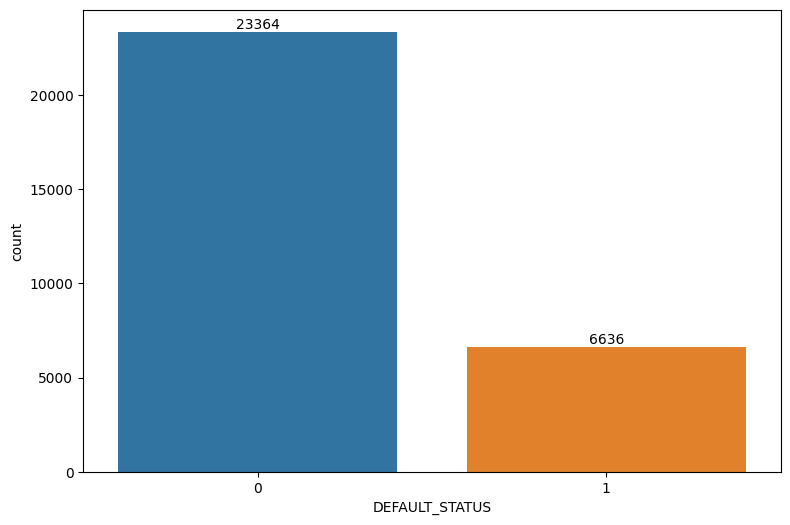

In [ ]:
# Chart - 1 visualization code
# Visualising our target variable to check for any data imbalance
plt.figure(figsize=(9,6))
ax = sns.countplot(x=dataset["DEFAULT_STATUS"])
ax.bar_label(ax.containers[0])
plt.show()

#####  What is/are the insight(s) found from the chart?

We can see from count plot that there is some imbalance between our target variables. 


* **No. of default in the next month = 6636**
* **No. of non-default in the next month = 23364**

To overcome the imbalance, we would need to use some resampling techniques like:
* Undersampling
* Oversampling
* SMOTE
* Tomek-Links

#### Chart - 2

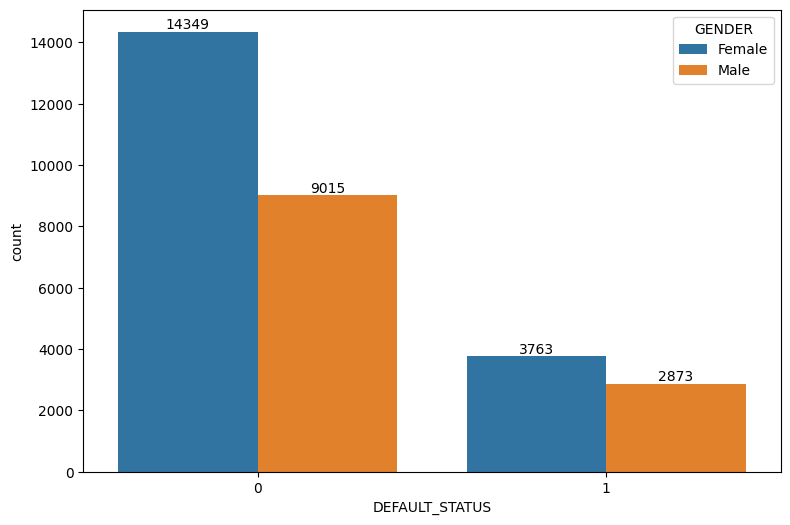

In [ ]:
# Chart - 2 visualization code
# Visualising our target variable with Gender and check which gender has the most default

plt.figure(figsize=(9,6))
ax = sns.countplot(x=dataset["DEFAULT_STATUS"], hue=dataset['GENDER'])
for label in ax.containers:
  ax.bar_label(label)
plt.show()

#####  What is/are the insight(s) found from the chart?

Insights from the above plot:

* Female have more number of credit cards than men.
* Around 21% of total female clients default from payment.
* Around 24% of total male clients default from payment.

#### Chart - 3

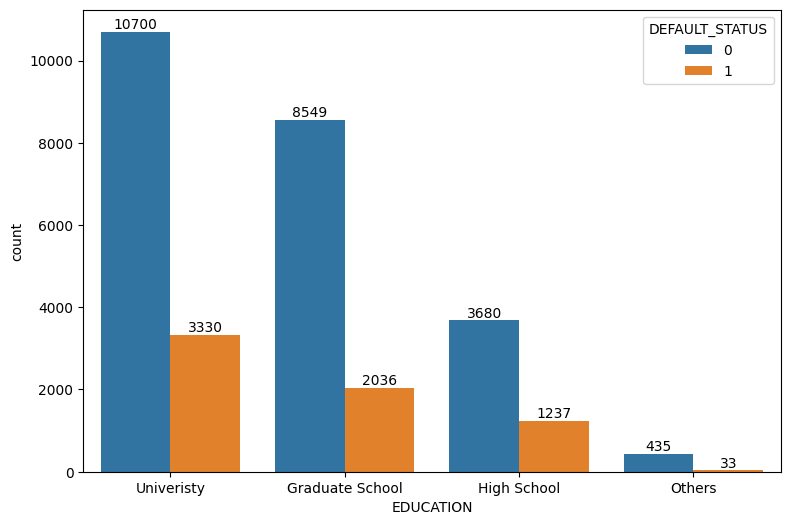

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(9,6))
ax = sns.countplot(x=dataset['EDUCATION'], hue=dataset['DEFAULT_STATUS'])
for label in ax.containers:
  ax.bar_label(label)
plt.show()

##### What is/are the insight(s) found from the chart?

Insights from above plot:

* Most (i.e. around 82%) of the credit card clients have went to a University or a Graduate School.
* Around 23% of credit card clients who went to University will default on their payments.
* Around 19% of credit card clients who went to a Graduate School will default on their payments.
* Around 25% of credit card clients who went to a High School will default on their payments.

#### Chart - 4

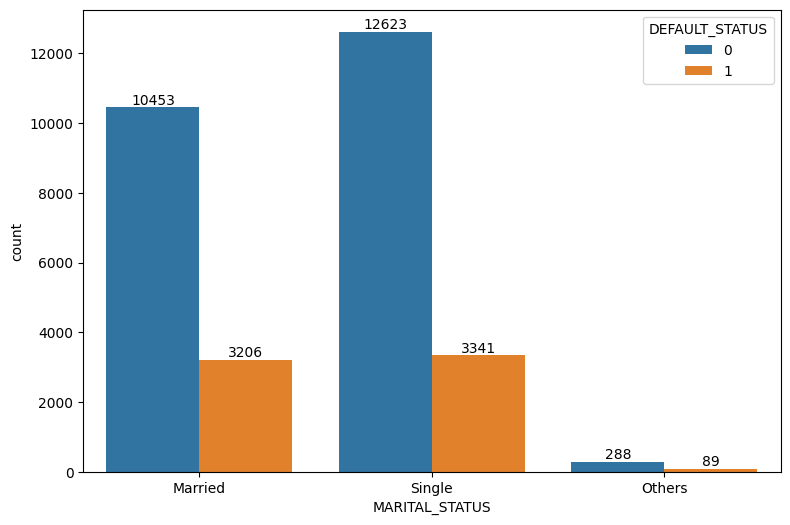

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(9,6))
ax = sns.countplot(x=dataset['MARITAL_STATUS'], hue=dataset['DEFAULT_STATUS'])
for label in ax.containers:
  ax.bar_label(label)
plt.show()

##### What is/are the insight(s) found from the chart?

Insights from above plot:

* Credit card clients who are single, are more in number than Credit Card clients who are married.
* Around 21% sinlge credit card clients default on their payment.
* Around 23% married credit card clients default on thier payment.

#### Chart - 5

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT_STATUS'],
      dtype='object')

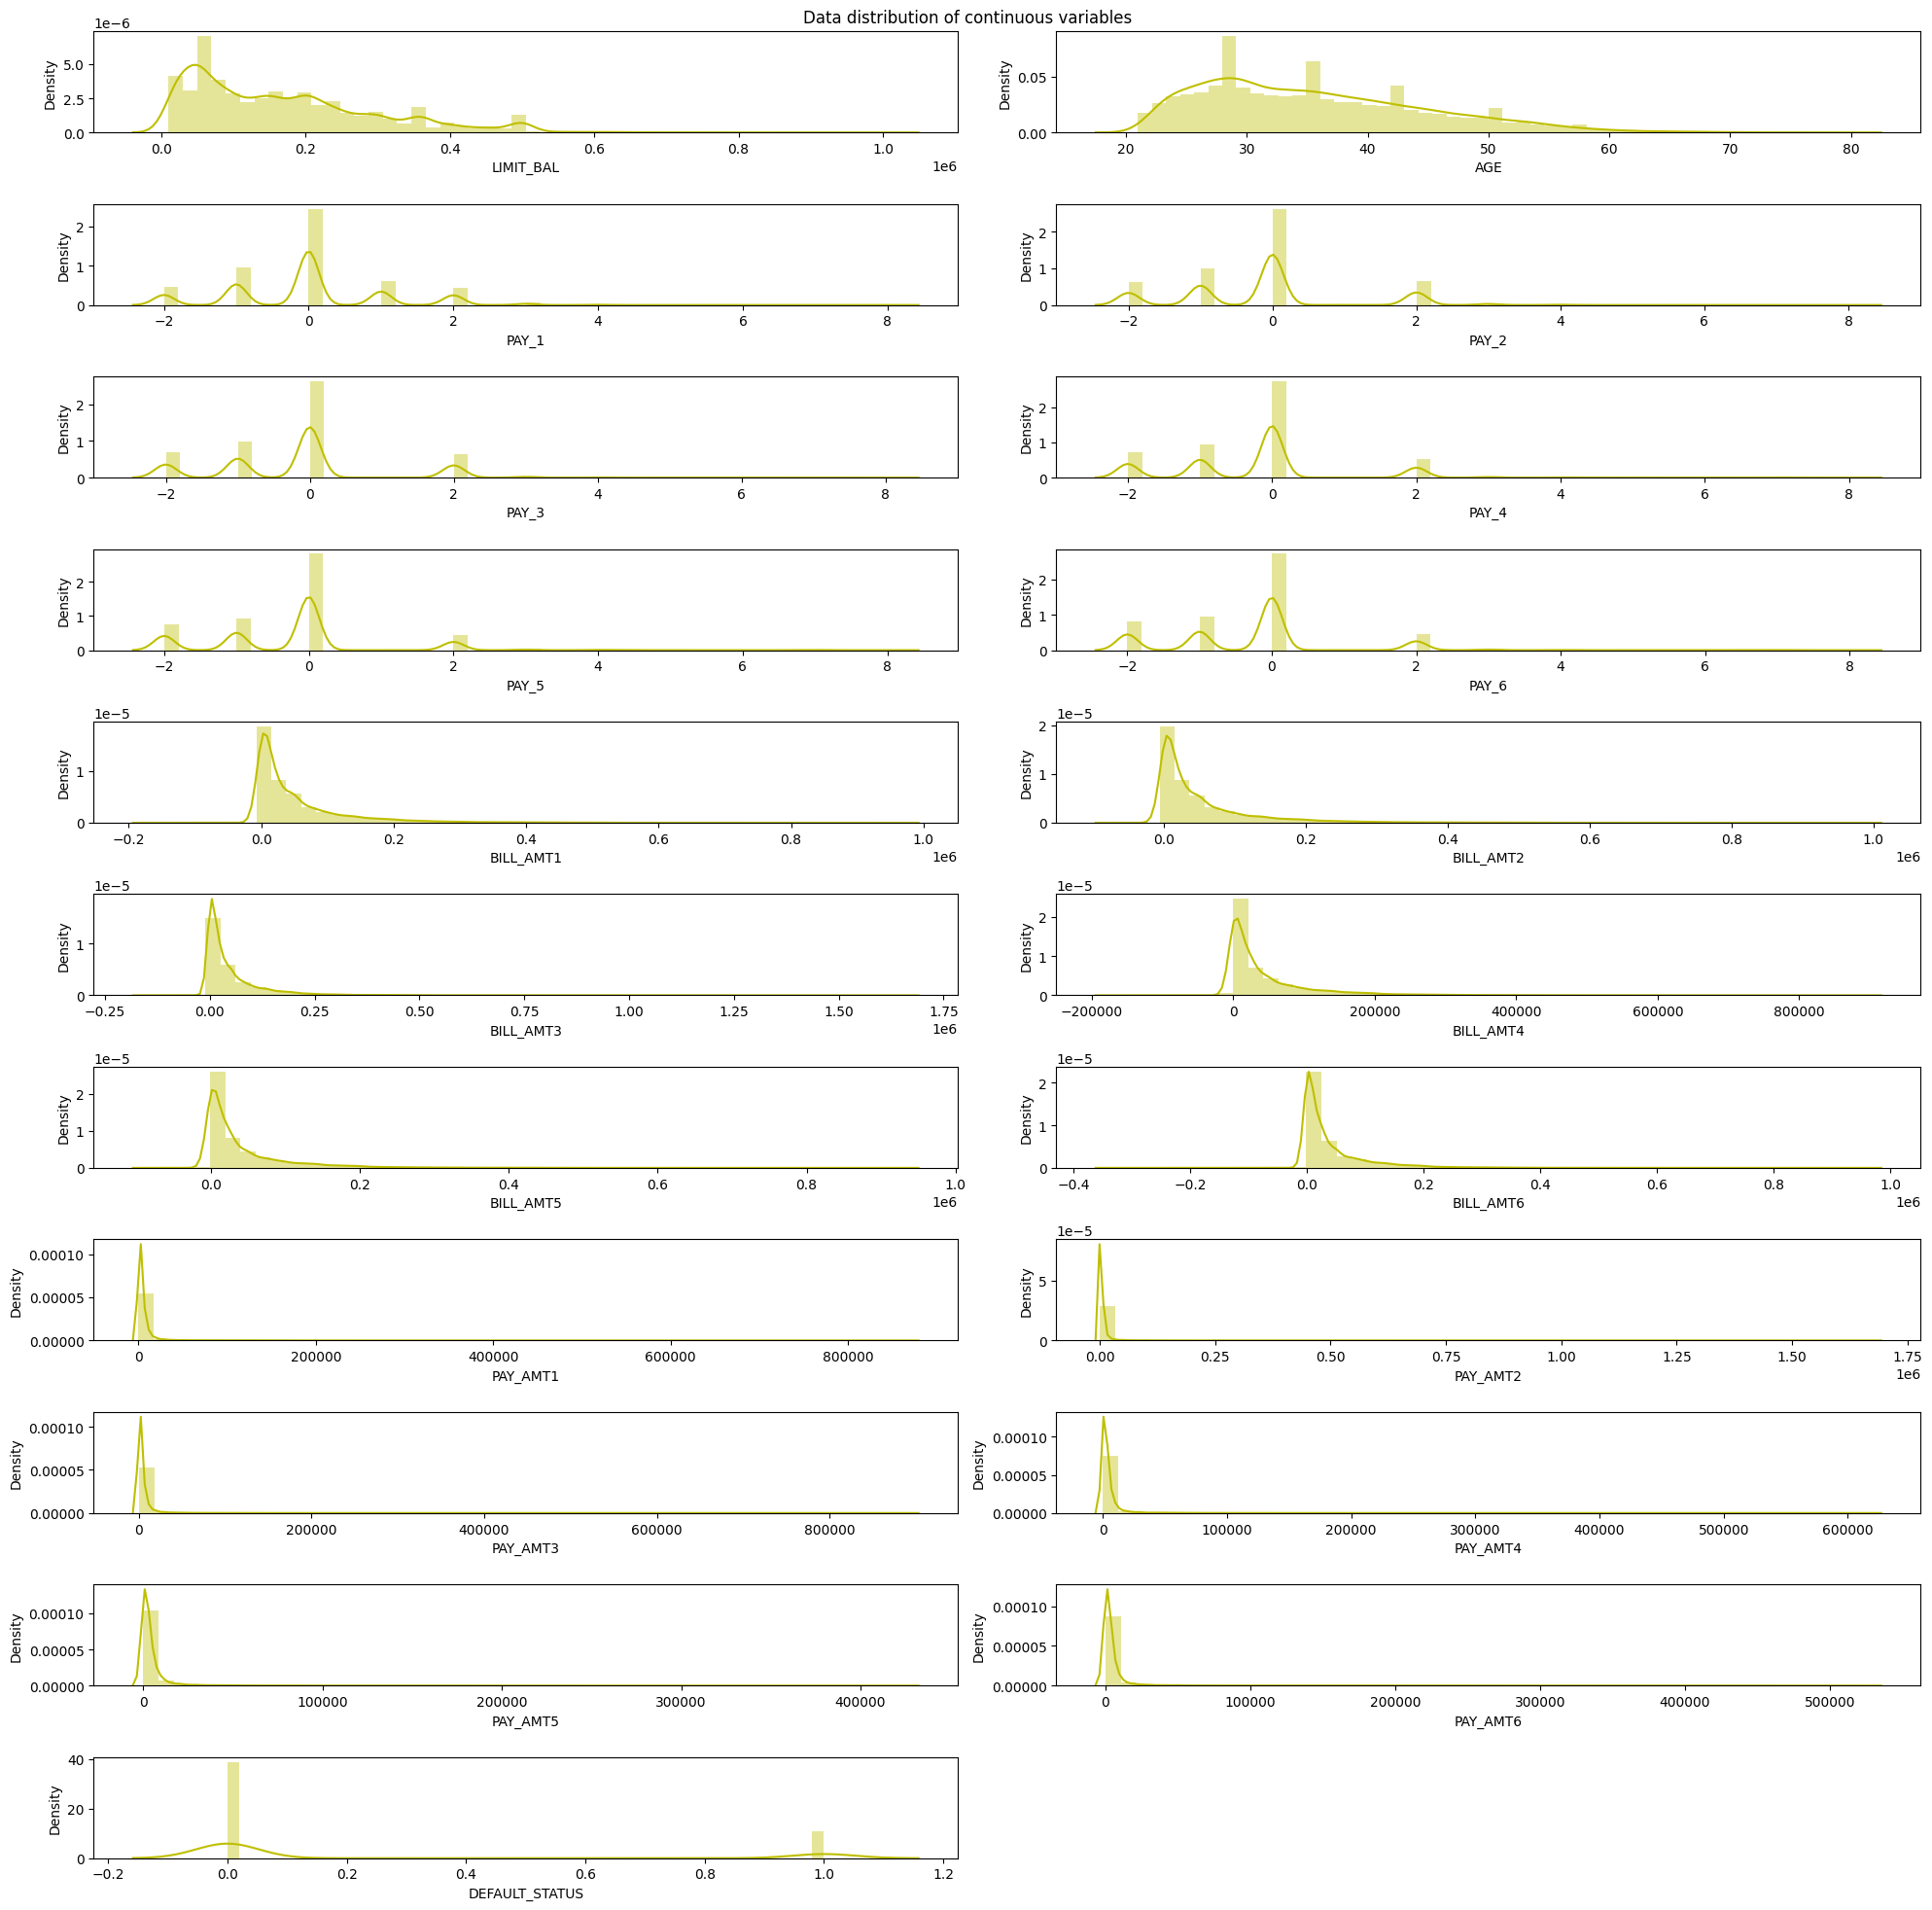

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(20,20))
for i, col in enumerate(numeric_features):
    ax = plt.subplot(11,2, i+1)
    sns.distplot(dataset[col], color='y')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT_STATUS'],
      dtype='object')

In [ ]:
categorical_features = dataset.describe(include=['object','category']).columns
categorical_features

Index(['GENDER', 'EDUCATION', 'MARITAL_STATUS'], dtype='object')

In [ ]:
for i, col in enumerate(numeric_features):
  print(F"Skewness of {col} = {dataset[col].skew()}")
  print(F"Kurtosis of {col} = {dataset[col].kurt()}")
  print("**************************************************************************")

Skewness of LIMIT_BAL = 0.992866960519544
Kurtosis of LIMIT_BAL = 0.536262896398668
**************************************************************************
Skewness of AGE = 0.7322458687830562
Kurtosis of AGE = 0.04430337823580954
**************************************************************************
Skewness of PAY_1 = 0.7319749269085081
Kurtosis of PAY_1 = 2.7207150417164834
**************************************************************************
Skewness of PAY_2 = 0.7905650222025086
Kurtosis of PAY_2 = 1.5704177295124482
**************************************************************************
Skewness of PAY_3 = 0.8406818269466301
Kurtosis of PAY_3 = 2.0844358750689342
**************************************************************************
Skewness of PAY_4 = 0.9996294133044786
Kurtosis of PAY_4 = 3.49698349574992
**************************************************************************
Skewness of PAY_5 = 1.0081970251062178
Kurtosis of PAY_5 = 3.9897481437030193
***

##### What is/are the insight(s) found from the chart?

All the variables are positively skewed. We will have to apply some transformation to make it normally distributed.

#### Chart - 6

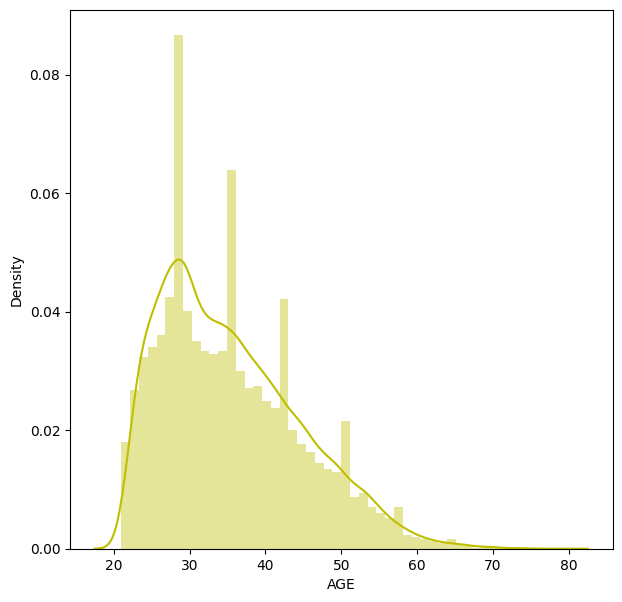

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(7,7))
sns.distplot(dataset['AGE'], color="y")
plt.show()

In [ ]:
print("Skewness :", dataset['AGE'].skew())
print("Kurtosis :", dataset['AGE'].kurt())

Skewness : 0.7322458687830562
Kurtosis : 0.04430337823580954


##### What is/are the insight(s) found from the chart?

From the above, we can see that **AGE** is positively skewed. We would need to apply some kind of transformation to make it normally distributed.

In [ ]:
import plotly.express as px

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# Analysing PAY_AMT1 and BILL_AMT1 together
fig = px.scatter(dataset, x="PAY_AMT1", y="BILL_AMT1", color="DEFAULT_STATUS")
fig.show()

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# Analysing PAY_AMT2 and BILL_AMT2 together
fig = px.scatter(dataset, x="PAY_AMT2", y="BILL_AMT2", color="DEFAULT_STATUS")
fig.show()

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
# Analysing PAY_AMT3 and BILL_AMT3 together
fig = px.scatter(dataset, x="PAY_AMT3", y="BILL_AMT3", color="DEFAULT_STATUS")
fig.show()

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
# Analysing PAY_AMT4 and BILL_AMT4 together
fig = px.scatter(dataset, x="PAY_AMT4", y="BILL_AMT4", color="DEFAULT_STATUS")
fig.show()

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
# Analysing PAY_AMT5 and BILL_AMT5 together
import plotly.express as px
fig = px.scatter(dataset, x="PAY_AMT5", y="BILL_AMT5", color="DEFAULT_STATUS")
fig.show()

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
# Analysing PAY_AMT6 and BILL_AMT6 together
fig = px.scatter(dataset, x="PAY_AMT6", y="BILL_AMT6", color="DEFAULT_STATUS")
fig.show()

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
# Box plot - For checking of outliers
for i, col in enumerate(dataset.select_dtypes(include=['float64','int64']).columns):
  fig = px.box(dataset, x=col)
  fig.show()

Output hidden; open in https://colab.research.google.com to view.

##### 2. What is/are the insight(s) found from the chart?

From the above box-plots, we derive:

* The variables with less outliers are:
    *   **LIMIT_BAL**
    *   **AGE**
    *   **PAY_1 to PAY_6**
* The variables with very high outliers are:
    *   **PAY_AMT1 to PAY_AMT6**
    *   **BILL_AMT1 to BILL_AMT6**

We would have have to apply some sort of transformation to get rid of these outliers.

#### Chart - 14 - Correlation Heatmap

<Axes: >

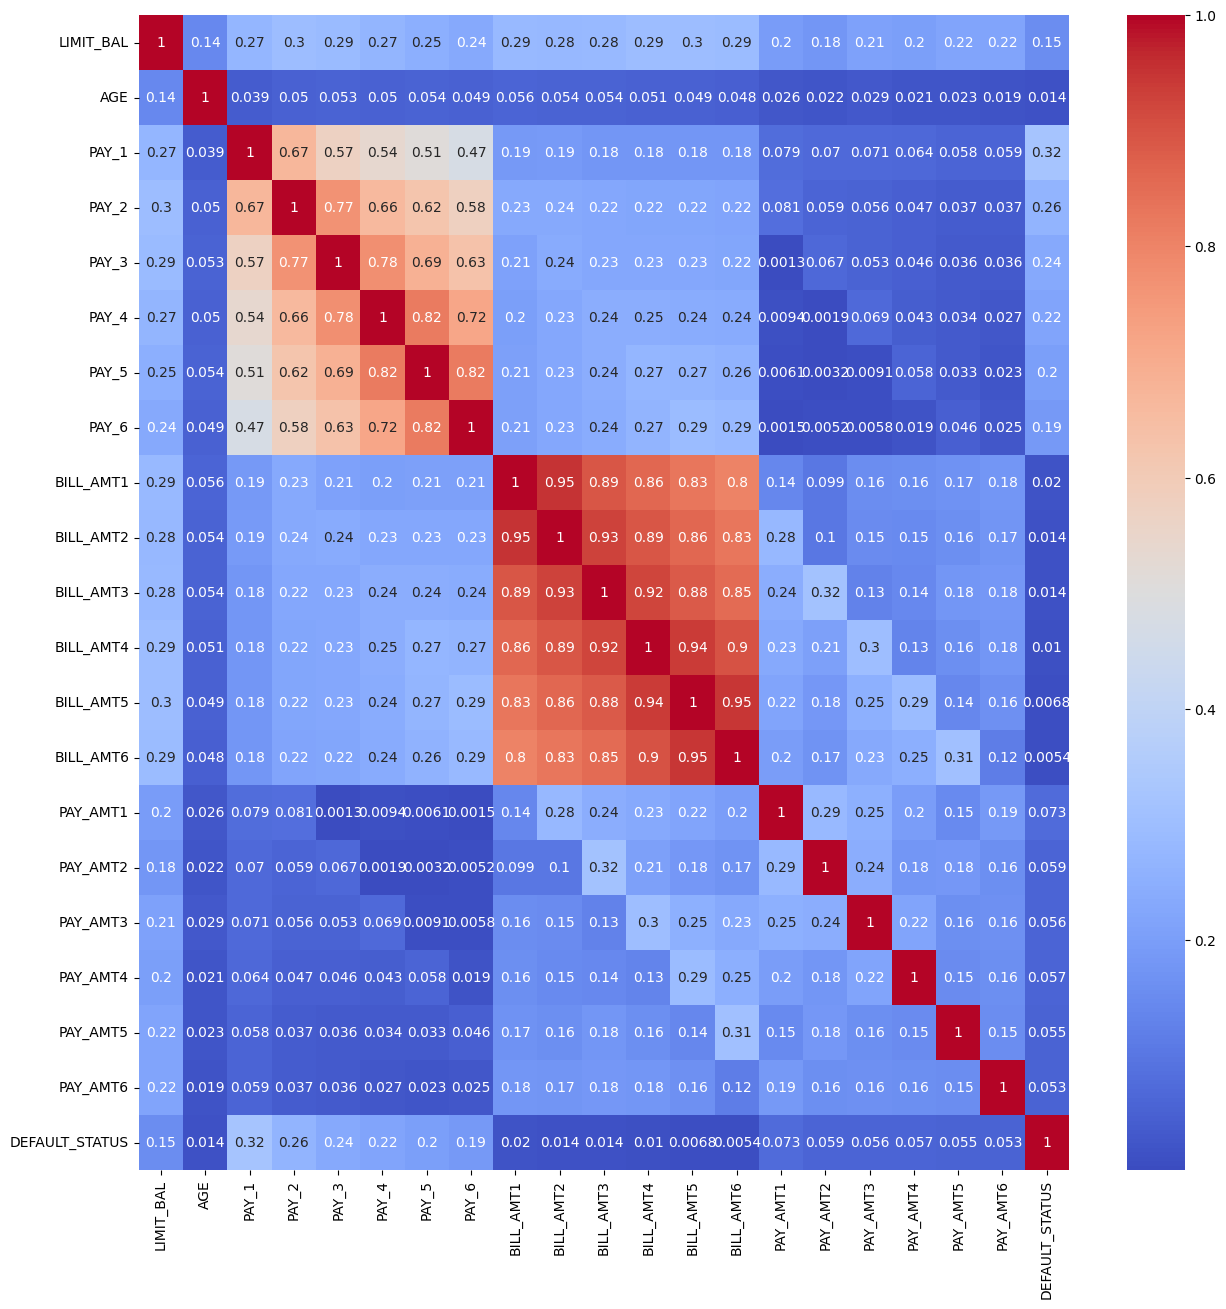

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,15))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### What is/are the insight(s) found from the chart?

Insights from the heatmap above:

* The correlation among PAY_1, PAY_2, PAY_3, PAY_4, PAY_5 and PAY_6 is very high.
* The correlation among BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 is very high.

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(15,15))
sns.pairplot(dataset)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LIMIT_BAL       30000 non-null  int64 
 1   GENDER          30000 non-null  object
 2   EDUCATION       30000 non-null  object
 3   MARITAL_STATUS  30000 non-null  object
 4   AGE             30000 non-null  int64 
 5   PAY_1           30000 non-null  int64 
 6   PAY_2           30000 non-null  int64 
 7   PAY_3           30000 non-null  int64 
 8   PAY_4           30000 non-null  int64 
 9   PAY_5           30000 non-null  int64 
 10  PAY_6           30000 non-null  int64 
 11  BILL_AMT1       30000 non-null  int64 
 12  BILL_AMT2       30000 non-null  int64 
 13  BILL_AMT3       30000 non-null  int64 
 14  BILL_AMT4       30000 non-null  int64 
 15  BILL_AMT5       30000 non-null  int64 
 16  BILL_AMT6       30000 non-null  int64 
 17  PAY_AMT1        30000 non-null  int64 
 18  PAY_AM

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There are no missing values.

### 2. Handling Outliers

Remember, we have skewness in our data as seen from the charts previously. Also, above we see that there are outliers. So, we needed to fix it before proceeding. Here, we are using PowerTransformer. Power transfom is a family of functions that transform data using power laws. The idea is to apply a transformation to each feature of our dataset. What’s the purpose of a power transform? The idea is to increase the symmetry of the distribution of the features. If a features is asymmetric, applying a power transformation will make it more symmetric. The most common power transformations are the **Box-Cox** and the **Yeo-Johnson** transformations.

* **Box-Cox Transformation: Can be used be used on positive values only.**
* **Yeo-Johnson Transformation: Can be used on both positive and negative values.**


Here we are using **Yeo-Johnson Transformation**.

In [ ]:
# Getting all the numeric features from our dataset so that we can run transformation
numeric_features = dataset.describe().columns
numeric_features

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT_STATUS'],
      dtype='object')

In [ ]:
# Removing the columns PAY_1 to PAY_6 and DEFAULT_STATUS from numeric features. DEFAULT_STATUS is our target variable and PAY_1 to PAY_6 are our categorical variable
numeric_features = numeric_features.delete([2,3,4,5,6,7,-1])

In [ ]:
# Columns removed. 
numeric_features

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [ ]:
# Transformation of variables to remove skewness
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
dataset[numeric_features]=sc_X.fit_transform(dataset[numeric_features])

In [ ]:
dataset.columns

Index(['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_STATUS'],
      dtype='object')

In [ ]:
numeric_features

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

#### 3. Categorical-Encoding



In [ ]:
# Using OneHotEncoding on our categorical variables
dataset = pd.get_dummies(dataset, columns = ['GENDER', 'EDUCATION', 'MARITAL_STATUS', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

Since there are only 9 categorical features, I have used only One Hot Encoding. One Hot Encoding creates new columns as much as the number of unique values. One Hot Encoding makes our training data more useful and expressive, and it can be rescaled easily.

#### What all categorical encoding techniques have you used & why did you use those techniques?

In [ ]:
# Number of columns have increased due to the number of unique values
dataset.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT_STATUS', 'GENDER_Female',
       'GENDER_Male', 'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_Others', 'EDUCATION_Univeristy', 'MARITAL_STATUS_Married',
       'MARITAL_STATUS_Others', 'MARITAL_STATUS_Single', 'PAY_1_-2',
       'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4',
       'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-2', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1',
       'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7',
       'PAY_4_8', 'PAY_5_-2', 'PAY

### 4. Data Splitting

In [ ]:
X = dataset.drop('DEFAULT_STATUS', axis=1)
y = dataset['DEFAULT_STATUS']

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(24000, 87)
(6000, 87)


##### What data splitting ratio have you used and why? 

I have used standard splitting ratio of 20% and 80%.

### 5. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
y_train.value_counts()

0    18661
1     5339
Name: DEFAULT_STATUS, dtype: int64

In [ ]:
y_test.value_counts()

0    4703
1    1297
Name: DEFAULT_STATUS, dtype: int64

From the above, we can see that the data is imbalanced. 
* In our 24,000 training dataset, only **22%** of the data are defaults.
* In our 6000 test dataset, only **21.6%** of the data are defaults.
So, we will need to balance our both training and test dataset.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have not used Undersampling because it would lead to loss of data. In this case, it would mean loss of nearly 13,000 rows in our training dataset.

So instead, I have used **Synthetic Minority Oversampling Technique(SMOTE)** to balance our data. This technique generates synthetic data for minority class. SMOTE works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
# Handling Imbalanced Dataset (If needed)
print("Before oversampling: ",Counter(y_train))
SMOTE= SMOTE()

X_train,y_train= SMOTE.fit_resample(X_train,y_train)
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18661, 1: 5339})
After oversampling:  Counter({0: 18661, 1: 18661})


In [ ]:
# Handling Imbalanced Dataset (If needed)
print("Before oversampling: ",Counter(y_test))

X_test,y_test= SMOTE.fit_resample(X_test,y_test)
print("After oversampling: ",Counter(y_test))

Before oversampling:  Counter({0: 4703, 1: 1297})
After oversampling:  Counter({0: 4703, 1: 4703})


### 6. Data Scaling

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

Normalization and Standardization

The point of normalization is to change your observations so that they can be described as a normal distribution. Standardization (also called z-score normalization) transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

In [ ]:
# Using StandardScaler which is used for Standardisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## ***6. ML Model Implementation***

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

from sklearn import metrics


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

### ML Model - 1 - Logistic Regression

In [ ]:
# ML Model - 1 Implementation
logit= LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the Algorithm
logit.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
train_logit = logit.predict(X_train)

In [ ]:
pred_logit= logit.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(train_logit,y_train)
test_accuracy = accuracy_score(pred_logit,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.798697818980762
The accuracy on test data is  0.83010844142037


[[16902  1759]
 [ 5754 12907]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

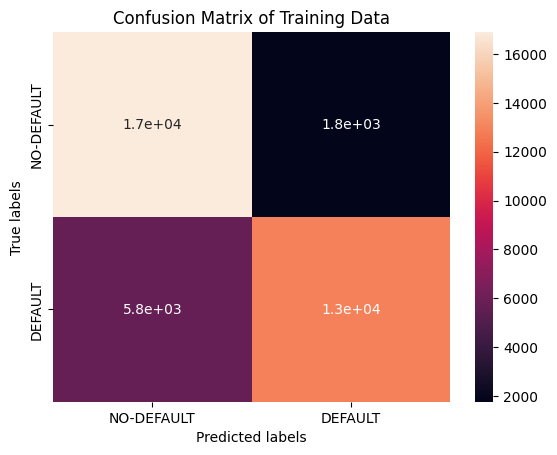

In [ ]:
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_train, train_logit)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Training Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[4257  446]
 [1152 3551]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

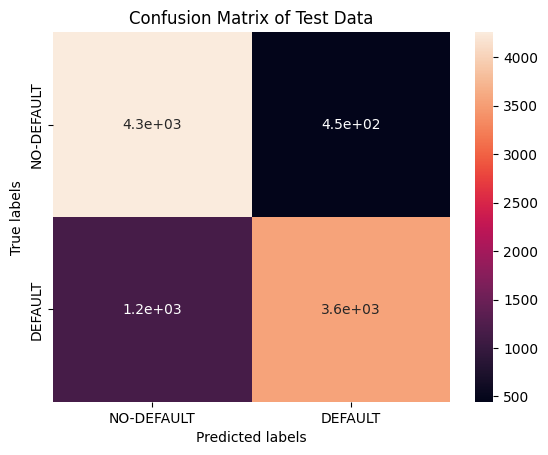

In [ ]:
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_test, pred_logit)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Test Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used **Logistic Regression**. It is a classification algorithm that predicts the probability of an outcome that can have only two values(i.e. dichotomy). It produces a logistic curve, limited to values between 0 and 1.

In [ ]:
print(classification_report(y_test, pred_logit))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      4703
           1       0.89      0.76      0.82      4703

    accuracy                           0.83      9406
   macro avg       0.84      0.83      0.83      9406
weighted avg       0.84      0.83      0.83      9406



From the above classification report we can deduce that:

* The model is able to correctly identify 75% of Default cases.
* The accuracy of the model is 83%.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000], 'fit_intercept': [True, False]}

logit_grid = GridSearchCV(LogisticRegression(), param_grid=grid_values, cv=10, verbose=1, scoring='recall')

# Fit the Algorithm
logit_grid.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [ ]:
print("The best parameters is found out to be :" ,logit_grid.best_params_)
print("\nUsing ",logit_grid.best_params_, " the recall score is: ", logit_grid.best_score_)

The best parameters is found out to be : {'C': 0.01, 'fit_intercept': True, 'penalty': 'l2'}

Using  {'C': 0.01, 'fit_intercept': True, 'penalty': 'l2'}  the recall score is:  0.6942407218279234


In [ ]:
logit2 = LogisticRegression(C=1, fit_intercept=False, penalty='l2')
logit2.fit(X_train, y_train)

LogisticRegression(C=1, fit_intercept=False)

In [ ]:
train_logit2 = logit2.predict(X_train)
pred_logit2= logit2.predict(X_test)

In [ ]:
train_accuracy2 = accuracy_score(train_logit2,y_train)
test_accuracy2 = accuracy_score(pred_logit2,y_test)

print("The accuracy on train data is ", train_accuracy2)
print("The accuracy on test data is ", test_accuracy2)


The accuracy on train data is  0.7927227908472215
The accuracy on test data is  0.8345736763767808


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV to obtain the best parameters to improve upon my Logistic Regression Model. 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
print(classification_report(y_test, pred_logit2))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      4703
           1       0.91      0.74      0.82      4703

    accuracy                           0.83      9406
   macro avg       0.85      0.83      0.83      9406
weighted avg       0.85      0.83      0.83      9406



Insights:

* The accuracy of the model has decreased by 1% after hyperparameter tuning. 
* The recall score has decreased by 1% after hyperparameter tuning. 

### ML Model - 2 - Decision Tree Classifier

In [ ]:
# ML Model-2 Implementation

cc_default_tree = DecisionTreeClassifier(criterion='gini', random_state=0, max_leaf_nodes=10)

# Fit the Algorithm
cc_default_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [ ]:
train_decision_tree = cc_default_tree.predict(X_train)
pred_decision_tree = cc_default_tree.predict(X_test)

In [ ]:
train_accuracy_tree = accuracy_score(train_decision_tree,y_train)
test_accuracy_tree = accuracy_score(pred_decision_tree,y_test)

print("The accuracy on train data is ", train_accuracy_tree)
print("The accuracy on test data is ", test_accuracy_tree)

The accuracy on train data is  0.6888162477895076
The accuracy on test data is  0.6780778226663832


[[11876  6785]
 [ 4829 13832]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

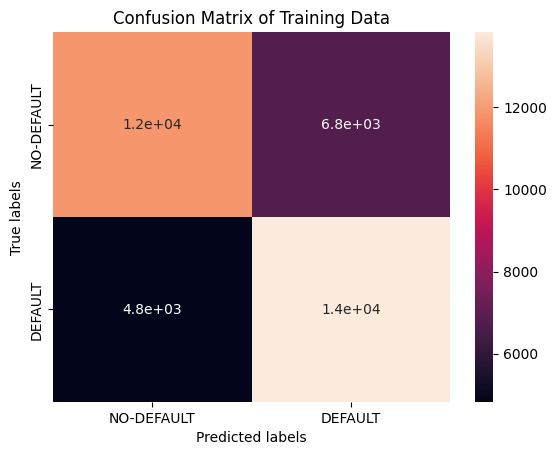

In [ ]:
labels = ['NO-DEFAULT', 'DEFAULT']
cm_tree = confusion_matrix(y_train, train_decision_tree)
print(cm_tree)

ax = plt.subplot()
sns.heatmap(cm_tree, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Training Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[2985 1718]
 [1310 3393]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

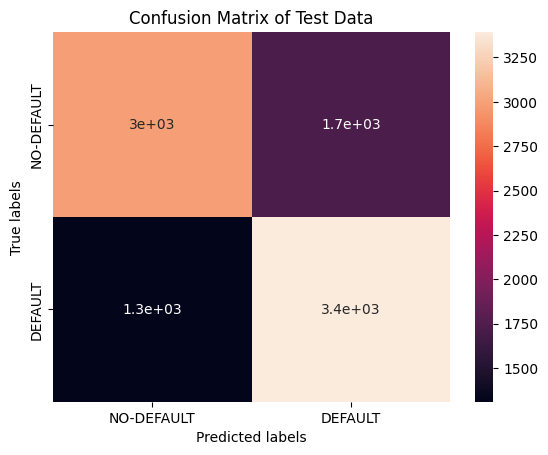

In [ ]:
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_test, pred_decision_tree)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Test Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The second model I have used is **Decision Tree Classifier**. The Decision Tree identifies the most significant variable and its value that gives best homogeneous sets of population.

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test, pred_decision_tree))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66      4703
           1       0.66      0.72      0.69      4703

    accuracy                           0.68      9406
   macro avg       0.68      0.68      0.68      9406
weighted avg       0.68      0.68      0.68      9406



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
tree_parameters = {'criterion':['gini','entropy','log_loss'], 'max_depth': np.arange(3, 15)}

cc_default_tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = tree_parameters, cv=10, verbose=2, scoring='recall')

# Fit the Algorithm
cc_default_tree_grid.fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END ........................criterion=gini, max_depth=3; total time=   0.3s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.3s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.3s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.3s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.3s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.3s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.3s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.3s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.3s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.3s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.3s
[CV] END ........................criterion=gin

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='recall', verbose=2)

In [ ]:
print("The best parameters is found out to be :" ,cc_default_tree_grid.best_params_)
print("\nUsing ",cc_default_tree_grid.best_params_, " the recall score is: ", cc_default_tree_grid.best_score_)

The best parameters is found out to be : {'criterion': 'gini', 'max_depth': 14}

Using  {'criterion': 'gini', 'max_depth': 14}  the recall score is:  0.7459495634392344


In [ ]:
cc_default_tree2 = DecisionTreeClassifier(criterion='gini', max_depth=14)
cc_default_tree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=14)

In [ ]:
train_decision_tree2 = cc_default_tree2.predict(X_train)
pred_decision_tree2 = cc_default_tree2.predict(X_test)

In [ ]:
train_accuracy_tree2 = accuracy_score(train_decision_tree2,y_train)
test_accuracy_tree2 = accuracy_score(pred_decision_tree2,y_test)

print("The accuracy on train data is ", train_accuracy_tree2)
print("The accuracy on test data is ", test_accuracy_tree2)

The accuracy on train data is  0.8481056749370345
The accuracy on test data is  0.740803742292154


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV to imporove upon my Decision Tree Classifier Model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
print(classification_report(y_test, pred_decision_tree2))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      4703
           1       0.75      0.72      0.73      4703

    accuracy                           0.74      9406
   macro avg       0.74      0.74      0.74      9406
weighted avg       0.74      0.74      0.74      9406



Insights:

* There has been a significant improvement in Accuracy(by 5%).
* Precision score has improved while Recall score has decreased by approx. 2%.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

### ML Model - 3 - Random Forest Classifier

In [ ]:
# ML Model - 3 Implementation
cc_random_forest = RandomForestClassifier(criterion='gini', max_leaf_nodes=10)

# Fit the Algorithm
cc_random_forest.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=10)

In [ ]:
train_randomforest_tree = cc_random_forest.predict(X_train)
pred_randomforest_tree = cc_random_forest.predict(X_test)

In [ ]:
train_accuracy_randomforest = accuracy_score(train_randomforest_tree, y_train)
test_accuracy_randomforest = accuracy_score(pred_randomforest_tree, y_test)
print("The accuracy on train data is ", train_accuracy_randomforest)
print("The accuracy on test data is ", test_accuracy_randomforest)

The accuracy on train data is  0.7203526070414233
The accuracy on test data is  0.7197533489262173


[[15068  3593]
 [ 6844 11817]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

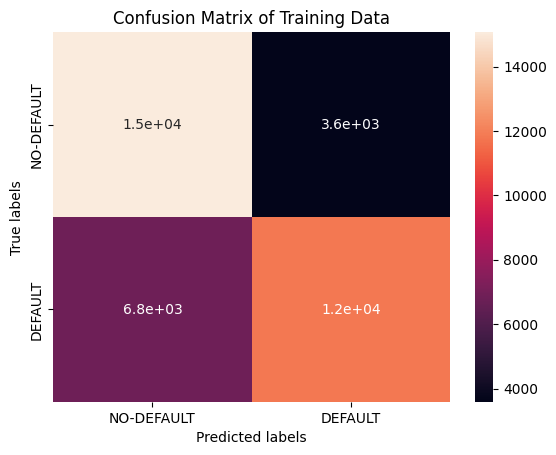

In [ ]:
labels = ['NO-DEFAULT', 'DEFAULT']
cm_tree = confusion_matrix(y_train, train_randomforest_tree)
print(cm_tree)

ax = plt.subplot()
sns.heatmap(cm_tree, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Training Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[3791  912]
 [1724 2979]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

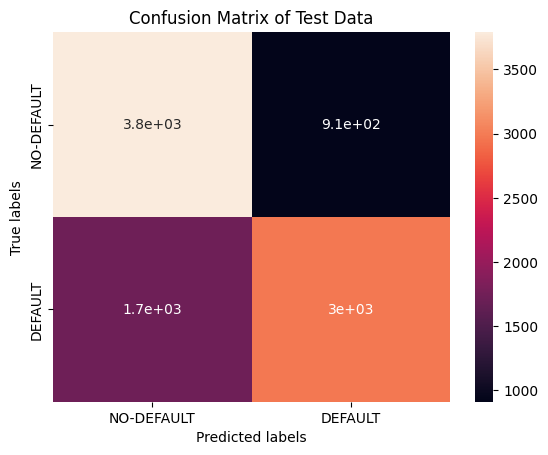

In [ ]:
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_test, pred_randomforest_tree)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Test Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The third model that I have used is Random Forest. In Random Forest, we grow multiple trees as opposed to a single tree in CART model. We construct trees from the subsets of the original dataset. These subsets can have a fraction of the columns as well as rows. To classify a new object based on attributes, each tree gives a classification and we say that the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest) and in case of regression, it takes the average of outputs by different trees.

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test, pred_randomforest_tree))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74      4703
           1       0.77      0.63      0.69      4703

    accuracy                           0.72      9406
   macro avg       0.73      0.72      0.72      9406
weighted avg       0.73      0.72      0.72      9406



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf_parameters = {'criterion': ['gini','entropy','log_loss'], 'max_depth': np.arange(3,15),'n_estimators':[2,5]}
cc_random_forest_grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_parameters, cv=10, scoring='recall')

# Fit the Algorithm
cc_random_forest_grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': [2, 5]},
             scoring='recall')

In [ ]:
print("The best parameters is found out to be :" ,cc_random_forest_grid.best_params_)
print("\nUsing ",cc_random_forest_grid.best_params_, " the recall score is: ", cc_random_forest_grid.best_score_)

The best parameters is found out to be : {'criterion': 'gini', 'max_depth': 14, 'n_estimators': 5}

Using  {'criterion': 'gini', 'max_depth': 14, 'n_estimators': 5}  the recall score is:  0.7591292264644979


In [ ]:
cc_random_forest2 = RandomForestClassifier(criterion='gini', max_depth=14, n_estimators=5)
cc_random_forest2.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, n_estimators=5)

In [ ]:
train_randomforest_tree2 = cc_random_forest2.predict(X_train)
pred_randomforest_tree2 = cc_random_forest2.predict(X_test)

In [ ]:
train_accuracy_randomforest2 = accuracy_score(train_randomforest_tree2, y_train)
test_accuracy_randomforest2 = accuracy_score(pred_randomforest_tree2, y_test)
print("The accuracy on train data is ", train_accuracy_randomforest2)
print("The accuracy on test data is ", test_accuracy_randomforest2)

The accuracy on train data is  0.8520443706125074
The accuracy on test data is  0.7483521156708484


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
print(classification_report(y_test, pred_randomforest_tree2))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76      4703
           1       0.79      0.68      0.73      4703

    accuracy                           0.75      9406
   macro avg       0.75      0.75      0.75      9406
weighted avg       0.75      0.75      0.75      9406



Insights:

* The accuracy has imporved by 3%.
* The recall value has vastly improved by 8%.

### ML Model - 4 - XGBoost

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
# ML Model - 4 - Implementation
xgboost = xgb.XGBClassifier()

# Fit the Algorithm
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
train_xgb = xgboost.predict(X_train)
pred_xgb = xgboost.predict(X_test)

In [ ]:
train_accuracy_xgb = accuracy_score(train_xgb, y_train)
test_accuracy_xgb = accuracy_score(pred_xgb, y_test)
print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.9182787631959702
The accuracy on test data is  0.8753986816925367


[[17921   740]
 [ 2310 16351]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

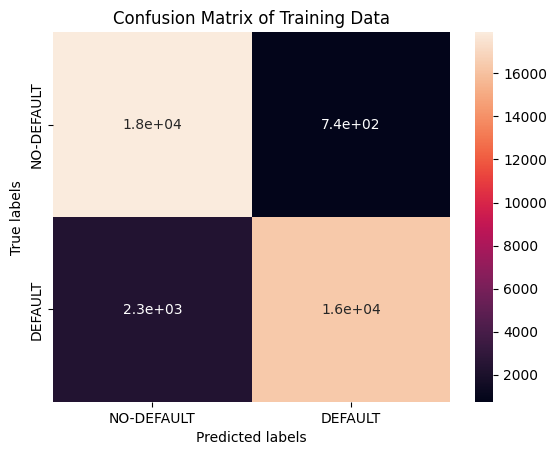

In [ ]:
labels = ['NO-DEFAULT', 'DEFAULT']
cm_tree = confusion_matrix(y_train, train_xgb)
print(cm_tree)

ax = plt.subplot()
sns.heatmap(cm_tree, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Training Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[4355  348]
 [ 824 3879]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

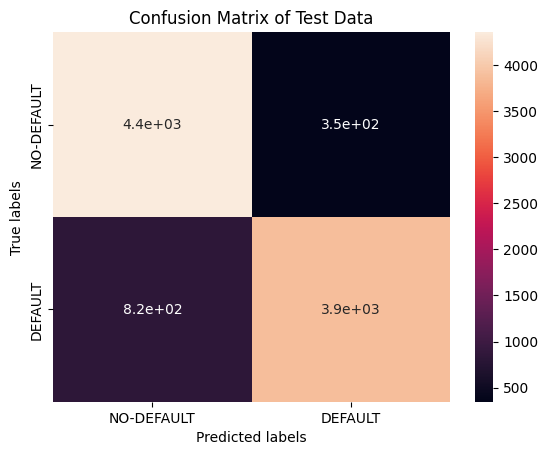

In [ ]:
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_test, pred_xgb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Test Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The 4th model that I have used is XGBoost. Extreme Gradient Boosting (XGBoost) is just an extension of gradient boosting. Gradient Boosting Machine (GBM) builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

In [ ]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4703
           1       0.92      0.82      0.87      4703

    accuracy                           0.88      9406
   macro avg       0.88      0.88      0.88      9406
weighted avg       0.88      0.88      0.88      9406



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# # ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# xgb_parameters = {
#  "learning_rate"    : [0.05, 0.10, 0.15, 0.20] ,
#  "max_depth"        : [ 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ]
# }
# xgboost_grid = GridSearchCV(xgb.XGBClassifier(), param_grid = xgb_parameters, scoring='recall', cv=3, verbose=3)

# # Fit the Algorithm
# xgboost_grid.fit(X_train, y_train)

In [ ]:
# print("The best parameters is found out to be :" ,xgboost_grid.best_params_)
# print("\nUsing ",xgboost_grid.best_params_, " the recall score is: ", xgboost_grid.best_score_)

In [ ]:
# xgboost2 = xgb.XGBClassifier(learning_rate=0.05, max_depth=15, min_child_weight=1)
# xgboost2.fit(X_train,y_train)

In [ ]:
# train_xgb2 = xgboost2.predict(X_train)
# pred_xgb2 = xgboost2.predict(X_test)

In [ ]:
# train_accuracy_xgb2 = accuracy_score(train_xgb2, y_train)
# test_accuracy_xgb2 = accuracy_score(pred_xgb2, y_test)
# print("The accuracy on train data is ", train_accuracy_xgb2)
# print("The accuracy on test data is ", test_accuracy_xgb2)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# print(classification_report(y_test, pred_xgb2))

Insights:
* Without best parameters obtained from GridSearchCV, our XGBoost model seems to be working very good. 
* With parameters from GridSearchCV, the accuracy of our test data has gone down.
* The recall value has also gone down by 5%. 

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The various evaluation metric available for classification problems are:
* **Accuracy** - 
Accuracy is just the percentage of predictions that were made correctly. As long as classes are more or less balanced (equal numbers of dog and not-dog images in the previous example), accuracy does a pretty good job of blending specificity and sensitivity, recall and precision.
* **Recall/Sensitivity** - 
Also called True Positive Rate. It is the fraction of all the real YESes that got put in the right bin. This gives sensitivity/recall/TPR a pretty specific use case, and it boils down to this: use it when when every instance of what you’re looking for is too precious to let slip by. 
* **Precision** - 
Of all the stuff the model pinged as YESes, what fraction of them are correct?
* **F1-Score** - 
 F1 score is the harmonic average of recall and precision, taking values between 0 and 1.

In the context of Credit Card Default problem, above metrics would mean the following:
* **Accuracy** - 
Number of correct Default predictions + Number of Non-Default predictions out of total predictions made. We’re just dividing the number of predictions the model got right against its total number of predictions.
* **Recall/Sensitivity** - 
Of the records that are indeed Default, what fraction of them did the model get right and call the default? How good is the model at catching Defaults?
* **Precision** - 
Percentage of correct Default predictions relative to total default predictions.

For our current problem, we would be mainly looking at the **Recall/Sensitivity** score of all the models and based on that we would choose our model. The reason being - It is important in credit card default cases where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected!

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

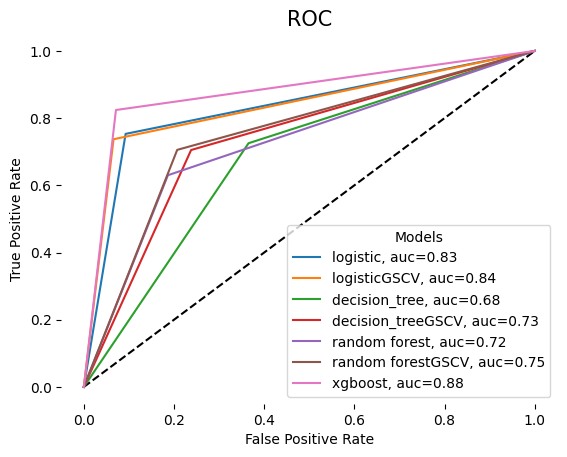

In [ ]:
# Logistic Regression Model 
fpr1, tpr1, _ = metrics.roc_curve(y_test,  pred_logit)
auc1 = metrics.roc_auc_score(y_test, pred_logit)

# Logistic Regression Model with Best Parameters obtained via GridSearchCV
fpr1_1, tpr1_1, _ = metrics.roc_curve(y_test,  pred_logit2)
auc1_1 = metrics.roc_auc_score(y_test, pred_logit2)

# decision tree model:
fpr2, tpr2, _ = metrics.roc_curve(y_test,  pred_decision_tree)
auc2 = metrics.roc_auc_score(y_test, pred_decision_tree)

# Decision Tree Model with Best Parameters obtained via GridSearchCV
fpr2_2, tpr2_2, _ = metrics.roc_curve(y_test,  pred_decision_tree2)
auc2_2 = metrics.roc_auc_score(y_test, pred_decision_tree2)

# random forest model: 
fpr3, tpr3, _ = metrics.roc_curve(y_test,  pred_randomforest_tree)
auc3 = metrics.roc_auc_score(y_test, pred_randomforest_tree)

# Random Forest Model with Best Parameters obtained via GridSearchCV
fpr3_3, tpr3_3, _ = metrics.roc_curve(y_test,  pred_randomforest_tree2)
auc3_3 = metrics.roc_auc_score(y_test, pred_randomforest_tree2)

# XGboost:
fpr4, tpr4, _ = metrics.roc_curve(y_test,  pred_xgb)
auc4 = metrics.roc_auc_score(y_test, pred_xgb)

# XGBoost Model with Best Parameters obtained via GridSearchCV
# fpr4_4, tpr4_4, _ = metrics.roc_curve(y_test,  pred_xgb2)
# auc4_4 = metrics.roc_auc_score(y_test, pred_xgb2)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="logistic, auc="+str(round(auc1,2)))
plt.plot(fpr1_1,tpr1_1,label="logisticGSCV, auc="+str(round(auc1_1,2)))
plt.plot(fpr2,tpr2,label="decision_tree, auc="+str(round(auc2,2)))
plt.plot(fpr2_2,tpr2_2,label="decision_treeGSCV, auc="+str(round(auc2_2,2)))
plt.plot(fpr3,tpr3,label="random forest, auc="+str(round(auc3,2)))
plt.plot(fpr3_3,tpr3_3,label="random forestGSCV, auc="+str(round(auc3_3,2)))
plt.plot(fpr4,tpr4,label="xgboost, auc="+str(round(auc4,2)))
# plt.plot(fpr4_4,tpr4_4,label="xgboostGSCV, auc="+str(round(auc4_4,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.show()


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Logistic'),
  Text(1, 0, 'LogisticGSCV'),
  Text(2, 0, 'Decision_Tree'),
  Text(3, 0, 'Decision_TreeGSCV'),
  Text(4, 0, 'Random_Forest'),
  Text(5, 0, 'Random_ForestGSCV'),
  Text(6, 0, 'XGBoost')])

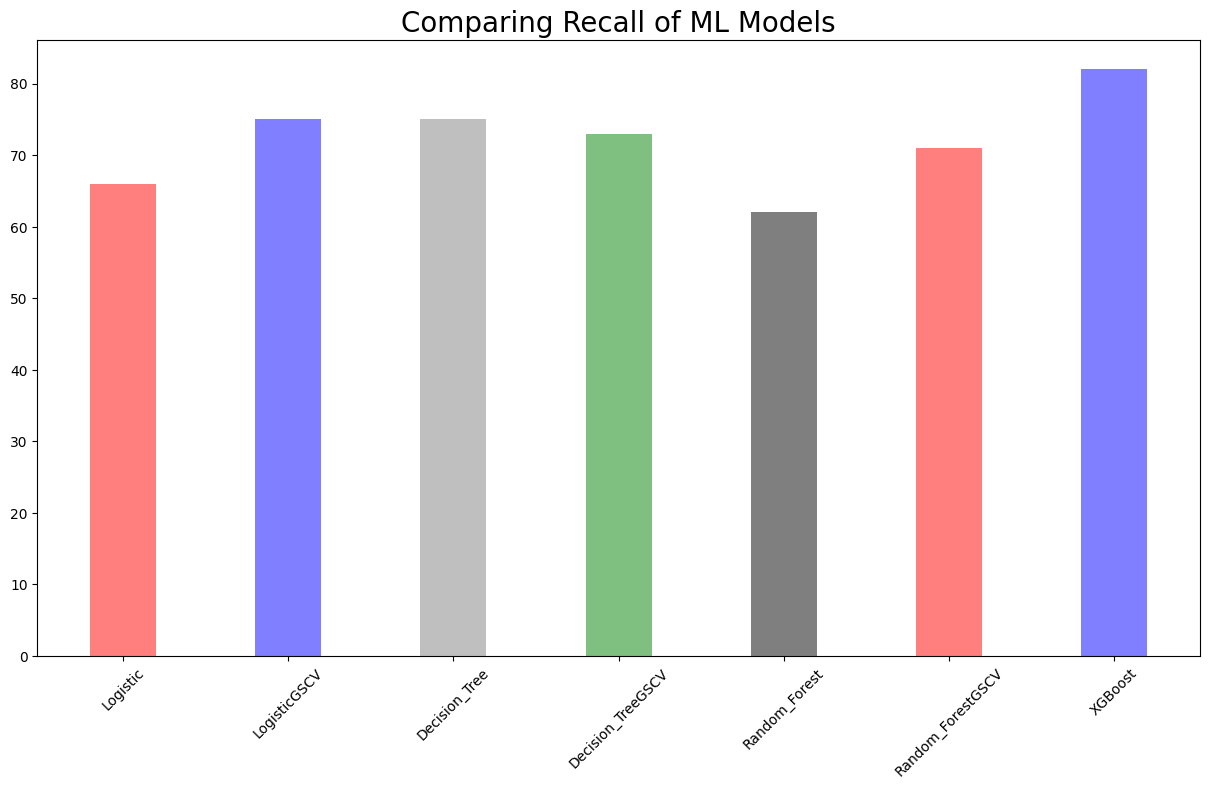

In [ ]:
data = {'Logistic':66, 'LogisticGSCV': 75,
                'Decision_Tree':75, 'Decision_TreeGSCV':73,
               'Random_Forest': 62, 'Random_ForestGSCV': 71,
                'XGBoost': 82}
courses = list(data.keys())
values = list(data.values())
plt.figure(figsize=(15,8))
plt.title('Comparing Recall of ML Models',fontsize=20)
colors=['red','blue','grey','green','black']
plt.bar(courses, values, color =colors,alpha=0.5,width = 0.4)
plt.xticks(rotation = 45)

From all the model, I have chosen XGboost as it give the highest recall value and AUC value is highest amongst all.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=4491f3560a93b2cb8583a72c052115f2d4e5b6da836c012bdd8aaa4bbb8942b6
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5 as eli

In [ ]:
eli.explain_weights(xgboost)

Weight,Feature
0.1570,f38
0.0734,f21
0.0613,f23
0.0472,f26
0.0467,f27
0.0425,f18
0.0398,f24
0.0372,f15
0.0339,f20
0.0290,f34


From the above Model Explainability tool, we can see that **PAY_2_1** is the important feature. 

## ***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Problem statement was to identify customers who are at risk of defaulting on their credit card payments.
* Dataset given to use was clean meaning no null values or duplicate values.
* Changed the name of some of columns for easy understandability.
* Dropped columns that were not necessary.
* Based on our data:
  * Female have more number of credit cards than men.
  * Around 21% of total female clients default from payment.
  * Most (i.e. around 82%) of the credit card clients have went to a University or a Graduate School.
  * Around 23% of credit card clients who went to University will default on their payments.
  * Around 25% of credit card clients who went to a High School will default on their payments.
  * Credit card clients who are single, are more in number than Credit Card clients who are married.
  * Around 23% married credit card clients default on thier payment.
* Most of the variables were positively skewed - Used Yeo-John Transformation to rectify them.
* Used OneHotEncoding for our categorical variables. 
* Used 4 algorithms to test our data:
  * Logistic Regression
  * Decision Trees
  * Random Forest Classifier
  * XGBoost
* XGBoost seems to give a very good recall value which is essential to our project and we would be choosing the same for our model. 

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***